In [1]:
import pandas as pd
airlines=pd.read_excel("HW04_Excel_CSAT.xlsx")

In [2]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
def check_df(dataframe):
    print(f"""
        ##################### Shape #####################\n\n\t{dataframe.shape}\n\n
        ##################### Types #####################\n\n{dataframe.dtypes}\n\n
        ##################### Head #####################\n\n{dataframe.head(5)}\n\n
        ##################### Tail #####################\n\n{dataframe.tail(5)}\n\n
        ##################### NA #####################\n\n{dataframe.isnull().sum()}\n\n
        """)
check_df(airlines)


        ##################### Shape #####################

	(103904, 24)


        ##################### Types #####################

id                                     int64
Gender                                object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanlines

In [4]:
df=airlines
df[df["Class"]=="Business"][["Seat comfort","Cleanliness","Inflight wifi service","On-board service","Food and drink"]].mean()

Seat comfort             2.879311
Cleanliness              3.477680
Inflight wifi service    3.608557
On-board service         3.679533
Food and drink           3.323789
dtype: float64

In [5]:
df=airlines
df_avrg=df[df["Class"]=="Business"].drop(columns=["id","NPS"]).describe().T.sort_values(by="mean",ascending=False)

In [6]:
df_cor=df[df["Class"] == "Business"].drop(columns=["id","NPS"]).select_dtypes(include=["number"]).corr()["satisfaction"].sort_values(ascending= False)


In [7]:
df_avrg.reset_index(inplace=True)
df_avrg=df_avrg[["index","mean"]]
df_avrg.columns=["Category","mean"]

In [8]:
df_cor=pd.DataFrame(df_cor)
df_cor.reset_index(inplace=True)
df_cor.columns=["Category","Corelation"]


In [9]:
df_corr_avrg=pd.merge(left=df_avrg,right=df_cor,how="inner",on="Category")

In [10]:
df_corr_avrg.sort_values(by="Corelation",ascending=False)

,Category,mean,Corelation
12,satisfaction,3.461230,1.000000
9,Inflight wifi service,3.608557,0.650547
18,Inflight entertainment,2.841015,0.597927
7,On-board service,3.679533,0.559018
8,Leg room service,3.647015,0.520843
5,Inflight service,4.185604,0.495320
6,Online boarding,3.727414,0.489956
11,Cleanliness,3.477680,0.485854
15,Ease of Online booking,2.956086,0.468448
16,Departure/Arrival time convenient,2.951656,0.439694


In [11]:
df.pivot_table(values='Flight Distance', index='Class', aggfunc='mean')

,Flight Distance
Class,
Business,1675.976925
Eco,743.439748
Eco Plus,747.125567


<Axes: xlabel='Class', ylabel='Flight Distance'>

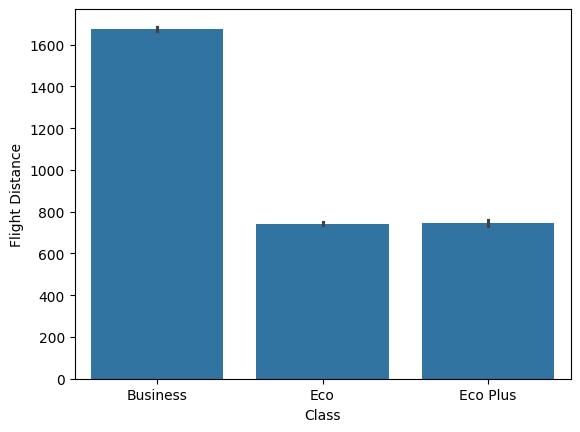

In [12]:
sns.barplot(df,x="Class",y="Flight Distance")

In [13]:
df["_Age_Segment"]=pd.cut(df["Age"],bins=[0,18,30,45,60,75,80,100],labels=["0-18","19-30","31-45","46-60","61-75","76-80","+80"],right=True)

In [14]:
df.groupby("_Age_Segment",as_index=False).agg({"Seat comfort":"mean","Inflight entertainment":"mean", "Inflight wifi service":"mean", "Cleanliness":"mean", "On-board service":"mean", "Leg room service":"mean", "Checkin service":"mean"})

/var/folders/50/8zx_6x713jv2x3s7tf2tpsqr0000gn/T/ipykernel_3700/827559586.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("_Age_Segment",as_index=False).agg({"Seat comfort":"mean","Inflight entertainment":"mean", "Inflight wifi service":"mean", "Cleanliness":"mean", "On-board service":"mean", "Leg room service":"mean", "Checkin service":"mean"})


,_Age_Segment,Seat comfort,Inflight entertainment,Inflight wifi service,Cleanliness,On-board service,Leg room service,Checkin service
0,0-18,2.305758,2.359187,3.373892,3.058480,3.205074,3.206533,3.200584
1,19-30,2.403807,2.446662,3.447878,3.203833,3.242830,3.208068,3.235575
2,31-45,2.677854,2.659178,3.555155,3.322898,3.429688,3.429027,3.306207
3,46-60,2.868812,2.772419,3.606137,3.428423,3.557539,3.528594,3.426485
4,61-75,2.541960,2.376466,3.364347,3.112067,3.155069,3.010425,3.176310
5,76-80,2.371930,2.284211,3.414035,2.863158,2.866667,2.929825,2.687719
6,+80,2.647059,2.117647,3.411765,3.411765,2.588235,3.294118,3.411765


In [15]:
df.groupby(["_Age_Segment","Gender"],as_index=False).agg({"Seat comfort":"mean","Inflight entertainment":"mean", "Inflight wifi service":"mean", "Cleanliness":"mean", "On-board service":"mean", "Leg room service":"mean", "Checkin service":"mean"})

/var/folders/50/8zx_6x713jv2x3s7tf2tpsqr0000gn/T/ipykernel_3700/1118714921.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["_Age_Segment","Gender"],as_index=False).agg({"Seat comfort":"mean","Inflight entertainment":"mean", "Inflight wifi service":"mean", "Cleanliness":"mean", "On-board service":"mean", "Leg room service":"mean", "Checkin service":"mean"})


,_Age_Segment,Gender,Seat comfort,Inflight entertainment,Inflight wifi service,Cleanliness,On-board service,Leg room service,Checkin service
0,0-18,Female,2.321563,2.372986,3.332377,3.069742,3.211653,3.204811,3.192231
1,0-18,Male,2.289402,2.344906,3.416857,3.046825,3.198264,3.208314,3.209228
2,19-30,Female,2.392031,2.426816,3.419505,3.186697,3.220758,3.200193,3.207102
3,19-30,Male,2.416667,2.468333,3.478860,3.222544,3.266930,3.216667,3.266667
4,31-45,Female,2.687159,2.643118,3.542154,3.307748,3.420217,3.412967,3.301816
5,31-45,Male,2.668478,2.675361,3.568255,3.338163,3.439232,3.445209,3.310632
6,46-60,Female,2.926365,2.786551,3.607057,3.421039,3.567510,3.476565,3.417710
7,46-60,Male,2.810793,2.758172,3.605208,3.435868,3.547486,3.581046,3.435331
8,61-75,Female,2.698323,2.378323,3.365161,3.154323,3.098839,2.815484,3.165935
9,61-75,Male,2.382469,2.374572,3.363517,3.068966,3.212424,3.209266,3.186891


<Axes: xlabel='_Age_Segment', ylabel='Inflight wifi service'>

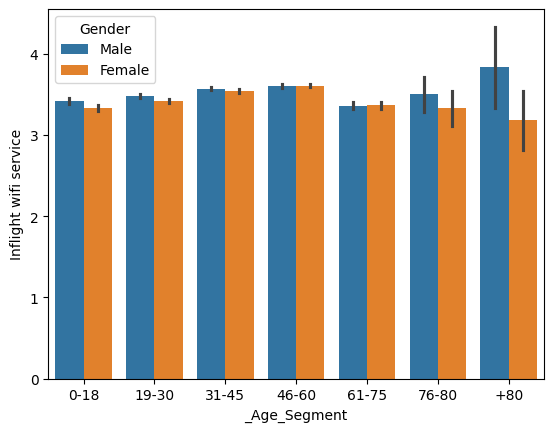

In [16]:
sns.barplot(df,x="_Age_Segment",y="Inflight wifi service",hue="Gender")

Text(0.5, 1.0, 'Korelasyon Matrix')

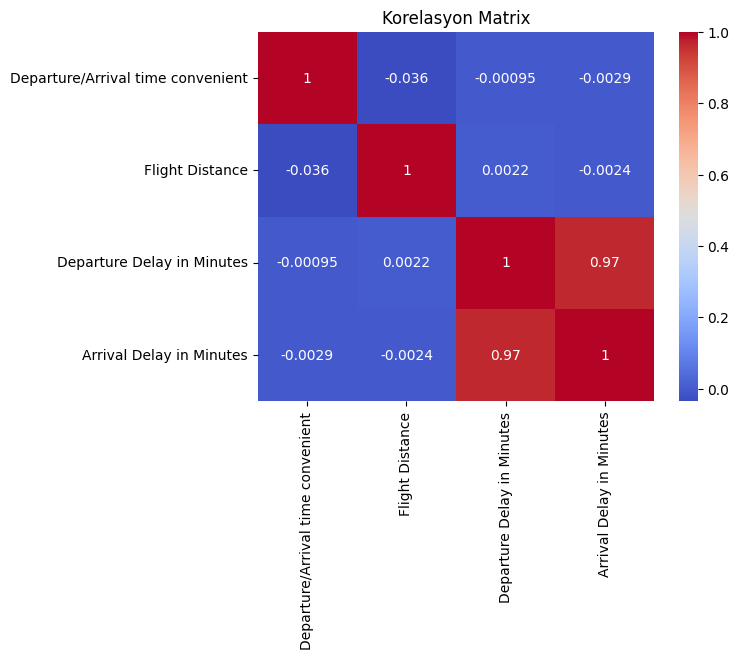

In [17]:
cols = ['Departure/Arrival time convenient', 'Flight Distance', 
        'Departure Delay in Minutes', 'Arrival Delay in Minutes']
df_corr = df[cols]

sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm")
plt.title("Korelasyon Matrix")

Text(0.5, 1.0, 'Flight Distance vs. Time Convenience')

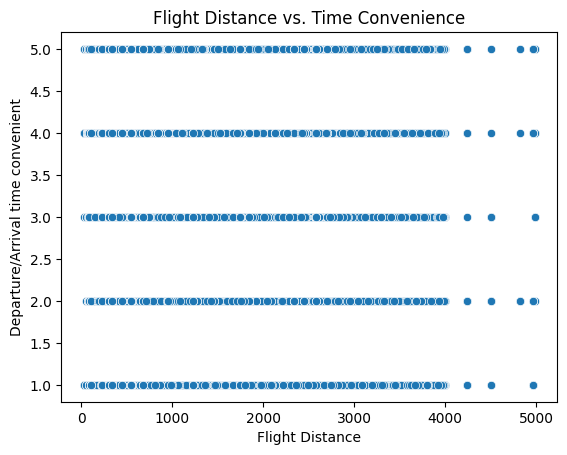

In [18]:
sns.scatterplot(data=df, x="Flight Distance", y="Departure/Arrival time convenient")
plt.title("Flight Distance vs. Time Convenience")


Text(0.5, 1.0, 'Departure Delay vs. Time Convenience')

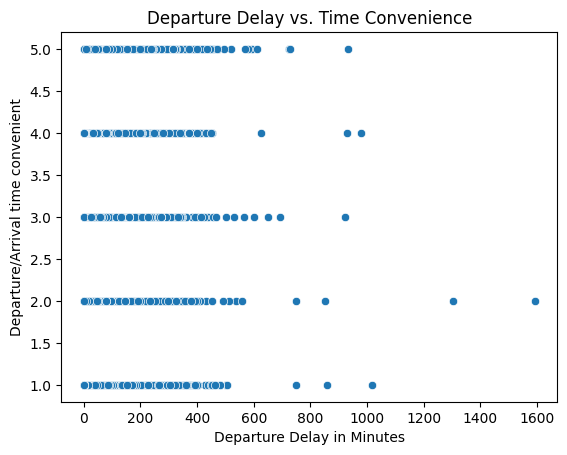

In [19]:
sns.scatterplot(data=df, x="Departure Delay in Minutes", y="Departure/Arrival time convenient")
plt.title("Departure Delay vs. Time Convenience")


Text(0.5, 1.0, 'Arrival Delay vs. Time Convenience')

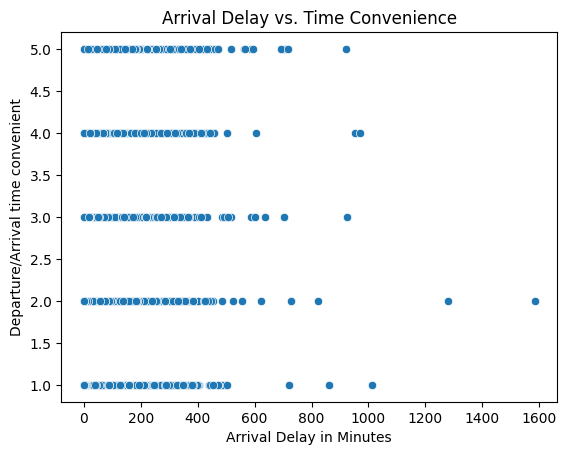

In [20]:
sns.scatterplot(data=df, x="Arrival Delay in Minutes", y="Departure/Arrival time convenient")
plt.title("Arrival Delay vs. Time Convenience")


Text(0.5, 1.0, 'Korelasyon Matrix')

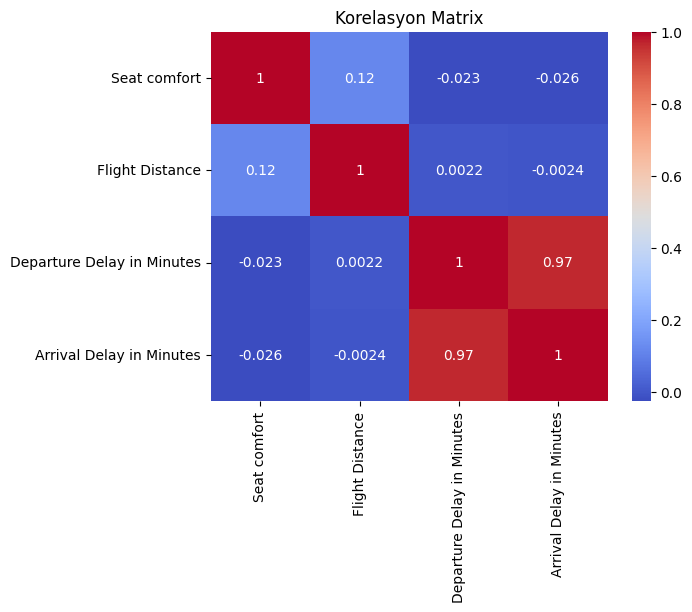

In [21]:
cols = ['Seat comfort', 'Flight Distance', 
        'Departure Delay in Minutes', 'Arrival Delay in Minutes']
df_corr=df[cols]
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm")
plt.title("Korelasyon Matrix")